# Subset correlation on pseudobulked data (import pseudobulk after nromalisation in python)

In [1]:
library(limma)
library(edgeR)
library(dplyr)


Attaching package: ‘dplyr’


The following objects are masked from ‘package:stats’:

    filter, lag


The following objects are masked from ‘package:base’:

    intersect, setdiff, setequal, union




In [2]:
# set directory
setwd('/scratch/user/s4436039/scdata/Pseudobulk')

### Load data:

In [3]:
#load data
sampleinfo_DC1 <- read.csv("pseudobulk_metadata_DC1.csv", row.names =1)
sampleinfo_DC2 <- read.csv("pseudobulk_metadata_DC2.csv", row.names =1)
sampleinfo_mregDC <- read.csv("pseudobulk_metadata_mregDC.csv", row.names =1)
head(sampleinfo_DC1)
head(sampleinfo_DC2)
head(sampleinfo_mregDC)
dim(sampleinfo_DC1)
dim(sampleinfo_DC2)
dim(sampleinfo_mregDC)

,cancer_broadest
,<chr>
GGSE223063_GLIO_1,GBM
GGSE223063_GLIO_3,GBM
GSE112271_HCC_Pt13,HCC
GSE112271_HCC_Pt14,HCC
GSE131907_LUAD_T0006,NSCLC
GSE131907_LUAD_T0008,NSCLC


,cancer_broadest
,<chr>
GGSE223063_GLIO_1,GBM
GGSE223063_GLIO_3,GBM
GSE112271_HCC_Pt13,HCC
GSE112271_HCC_Pt14,HCC
GSE131907_LUAD_T0006,NSCLC
GSE131907_LUAD_T0008,NSCLC


,cancer_broadest
,<chr>
GGSE223063_GLIO_1,GBM
GSE112271_HCC_Pt13,HCC
GSE112271_HCC_Pt14,HCC
GSE131907_LUAD_T0006,NSCLC
GSE131907_LUAD_T0008,NSCLC
GSE131907_LUAD_T0009,NSCLC


[1] 333   1

[1] 363   1

[1] 333   1

In [4]:
cts_DC1 <- read.csv("pseudobulk_DC1_norm.csv", row.names = 1)
cts_DC2 <- read.csv("pseudobulk_DC2_norm.csv", row.names = 1)
cts_mregDC <- read.csv("pseudobulk_mregDC_norm.csv", row.names = 1)
head(cts_DC1)
head(cts_DC2)
head(cts_mregDC)
dim(cts_DC1)
dim(cts_DC2)
dim(cts_mregDC)

,GGSE223063_GLIO_1,GGSE223063_GLIO_3,GSE112271_HCC_Pt13,GSE112271_HCC_Pt14,GSE131907_LUAD_T0006,GSE131907_LUAD_T0008,GSE131907_LUAD_T0009,GSE131907_LUAD_T0018,GSE131907_LUAD_T0019,GSE131907_LUAD_T0020,⋯,PMID32561858_breast_50,PMID32561858_breast_51,PMID32561858_breast_52,PRJCA005422_HGSOC1_PT,PRJCA005422_HGSOC2_PT,PRJCA005422_HGSOC3_PT,PRJCA005422_HGSOC4_PT,PRJCA005422_HGSOC7_PT,PRJCA005422_HGSOC8_PT,PRJCA005422_HGSOC9_PT
,<dbl>,<dbl>,<dbl>,<dbl>,<dbl>,<dbl>,<dbl>,<dbl>,<dbl>,<dbl>,⋯,<dbl>,<dbl>,<dbl>,<dbl>,<dbl>,<dbl>,<dbl>,<dbl>,<dbl>,<dbl>
FAM87B,0,0,0,0.00000,0.00000,0,0.000000,0.00000,0.00000,0.00000,⋯,0,0.000000,0,0.00000,0.00000,0.00000,0.000000,0.000000,0.00000,0.00000
LINC00115,0,0,0,15.48635,0.00000,0,4.961253,0.00000,0.00000,0.00000,⋯,0,0.000000,0,0.00000,13.65766,9.66744,9.749534,0.000000,0.00000,0.00000
FAM41C,0,0,0,0.00000,0.00000,0,0.000000,0.00000,0.00000,0.00000,⋯,0,0.000000,0,0.00000,0.00000,0.00000,0.000000,0.000000,0.00000,0.00000
SAMD11,0,0,0,0.00000,9.25369,0,0.000000,0.00000,0.00000,0.00000,⋯,0,0.000000,0,0.00000,0.00000,0.00000,0.000000,8.623515,0.00000,0.00000
NOC2L,0,0,0,30.97270,9.25369,0,34.728768,14.60494,12.81994,17.58304,⋯,0,45.838337,0,51.72414,13.65766,19.33488,29.248603,17.247029,37.36991,66.89411
KLHL17,0,0,0,0.00000,0.00000,0,0.000000,0.00000,0.00000,0.00000,⋯,0,9.167667,0,0.00000,0.00000,0.00000,0.000000,0.000000,0.00000,0.00000


,GGSE223063_GLIO_1,GGSE223063_GLIO_3,GSE112271_HCC_Pt13,GSE112271_HCC_Pt14,GSE131907_LUAD_T0006,GSE131907_LUAD_T0008,GSE131907_LUAD_T0009,GSE131907_LUAD_T0018,GSE131907_LUAD_T0019,GSE131907_LUAD_T0020,⋯,PMID32561858_breast_54,PRJCA005422_HGSOC1_PT,PRJCA005422_HGSOC2_PT,PRJCA005422_HGSOC3_PT,PRJCA005422_HGSOC4_PT,PRJCA005422_HGSOC6_PT,PRJCA005422_HGSOC7_PT,PRJCA005422_HGSOC8_PT,PRJCA005422_HGSOC9_PT,PRJCA005422_HGSOC10_PT
,<dbl>,<dbl>,<dbl>,<dbl>,<dbl>,<dbl>,<dbl>,<dbl>,<dbl>,<dbl>,⋯,<dbl>,<dbl>,<dbl>,<dbl>,<dbl>,<dbl>,<dbl>,<dbl>,<dbl>,<dbl>
FAM87B,0.00000,0,0.00000,0.000000,4.105343,0.000000,0.000000,0.00000,0.000000,3.001628,⋯,0,0.000000,0.000000,0.000000,0.00000,0.00000,0.000000,0,0.00000,0.00000
LINC00115,0.00000,0,0.00000,7.510609,6.158015,0.000000,4.332878,0.00000,4.263029,1.500814,⋯,0,1.369507,0.000000,0.000000,0.00000,0.00000,2.618247,0,0.00000,0.00000
FAM41C,6.62278,0,0.00000,7.510609,4.105343,0.000000,2.166439,0.00000,0.000000,1.500814,⋯,0,0.000000,0.000000,0.000000,0.00000,0.00000,2.618247,0,0.00000,14.07103
SAMD11,0.00000,0,0.00000,0.000000,0.000000,4.642332,0.000000,0.00000,0.000000,0.000000,⋯,0,0.000000,0.000000,6.255787,0.00000,0.00000,2.618247,0,0.00000,0.00000
NOC2L,26.49112,0,93.52787,45.063652,34.895416,27.853989,15.165072,24.23126,14.210096,25.513841,⋯,0,30.129144,40.609755,43.790506,30.24194,37.14434,18.327726,0,26.31579,42.21309
KLHL17,6.62278,0,0.00000,0.000000,2.052672,0.000000,2.166439,0.00000,1.421010,0.000000,⋯,0,0.000000,5.076219,0.000000,0.00000,0.00000,0.000000,0,13.15789,0.00000


,GGSE223063_GLIO_1,GSE112271_HCC_Pt13,GSE112271_HCC_Pt14,GSE131907_LUAD_T0006,GSE131907_LUAD_T0008,GSE131907_LUAD_T0009,GSE131907_LUAD_T0018,GSE131907_LUAD_T0019,GSE131907_LUAD_T0020,GSE131907_LUAD_T0025,⋯,PMID32561858_breast_51,PRJCA005422_HGSOC1_PT,PRJCA005422_HGSOC2_PT,PRJCA005422_HGSOC3_PT,PRJCA005422_HGSOC4_PT,PRJCA005422_HGSOC6_PT,PRJCA005422_HGSOC7_PT,PRJCA005422_HGSOC8_PT,PRJCA005422_HGSOC9_PT,PRJCA005422_HGSOC10_PT
,<dbl>,<dbl>,<dbl>,<dbl>,<dbl>,<dbl>,<dbl>,<dbl>,<dbl>,<dbl>,⋯,<dbl>,<dbl>,<dbl>,<dbl>,<dbl>,<dbl>,<dbl>,<dbl>,<dbl>,<dbl>
FAM87B,0.00000,0,0.00000,0.00000,0.00000,0,0.00000,0.00000,0.00000,0.000000,⋯,0.000000,0.00000,0.00000,0.00000,0.00000,0,0.000000,0,0,0
LINC00115,0.00000,0,0.00000,0.00000,0.00000,0,0.00000,0.00000,0.00000,6.444711,⋯,0.000000,0.00000,0.00000,0.00000,0.00000,0,6.714654,0,0,0
FAM41C,0.00000,0,0.00000,0.00000,0.00000,0,0.00000,0.00000,0.00000,0.000000,⋯,0.000000,0.00000,0.00000,0.00000,0.00000,0,0.000000,0,0,0
SAMD11,0.00000,0,0.00000,0.00000,0.00000,0,0.00000,0.00000,0.00000,0.000000,⋯,0.000000,0.00000,0.00000,0.00000,0.00000,0,0.000000,0,0,0
NOC2L,51.24132,0,42.17037,30.58197,39.69231,0,41.50842,17.59733,20.34436,25.778843,⋯,26.806058,14.66211,19.00201,28.50952,39.83191,0,6.714654,0,0,0
KLHL17,0.00000,0,0.00000,0.00000,0.00000,0,0.00000,0.00000,0.00000,0.000000,⋯,6.701515,0.00000,0.00000,0.00000,0.00000,0,0.000000,0,0,0


[1] 15074   333

[1] 15074   363

[1] 15074   333

### Find average pseudobulk expression across all patients for each cancer-subset pair:

#### DC1:

In [5]:
head(cts_DC1)

,GGSE223063_GLIO_1,GGSE223063_GLIO_3,GSE112271_HCC_Pt13,GSE112271_HCC_Pt14,GSE131907_LUAD_T0006,GSE131907_LUAD_T0008,GSE131907_LUAD_T0009,GSE131907_LUAD_T0018,GSE131907_LUAD_T0019,GSE131907_LUAD_T0020,⋯,PMID32561858_breast_50,PMID32561858_breast_51,PMID32561858_breast_52,PRJCA005422_HGSOC1_PT,PRJCA005422_HGSOC2_PT,PRJCA005422_HGSOC3_PT,PRJCA005422_HGSOC4_PT,PRJCA005422_HGSOC7_PT,PRJCA005422_HGSOC8_PT,PRJCA005422_HGSOC9_PT
,<dbl>,<dbl>,<dbl>,<dbl>,<dbl>,<dbl>,<dbl>,<dbl>,<dbl>,<dbl>,⋯,<dbl>,<dbl>,<dbl>,<dbl>,<dbl>,<dbl>,<dbl>,<dbl>,<dbl>,<dbl>
FAM87B,0,0,0,0.00000,0.00000,0,0.000000,0.00000,0.00000,0.00000,⋯,0,0.000000,0,0.00000,0.00000,0.00000,0.000000,0.000000,0.00000,0.00000
LINC00115,0,0,0,15.48635,0.00000,0,4.961253,0.00000,0.00000,0.00000,⋯,0,0.000000,0,0.00000,13.65766,9.66744,9.749534,0.000000,0.00000,0.00000
FAM41C,0,0,0,0.00000,0.00000,0,0.000000,0.00000,0.00000,0.00000,⋯,0,0.000000,0,0.00000,0.00000,0.00000,0.000000,0.000000,0.00000,0.00000
SAMD11,0,0,0,0.00000,9.25369,0,0.000000,0.00000,0.00000,0.00000,⋯,0,0.000000,0,0.00000,0.00000,0.00000,0.000000,8.623515,0.00000,0.00000
NOC2L,0,0,0,30.97270,9.25369,0,34.728768,14.60494,12.81994,17.58304,⋯,0,45.838337,0,51.72414,13.65766,19.33488,29.248603,17.247029,37.36991,66.89411
KLHL17,0,0,0,0.00000,0.00000,0,0.000000,0.00000,0.00000,0.00000,⋯,0,9.167667,0,0.00000,0.00000,0.00000,0.000000,0.000000,0.00000,0.00000


In [6]:
# transpose
cts_DC1_t <- as.data.frame(t(cts_DC1)) 

In [7]:
head(cts_DC1_t)

,FAM87B,LINC00115,FAM41C,SAMD11,NOC2L,KLHL17,PLEKHN1,HES4,ISG15,AGRN,⋯,MT-CO2,MT-ATP8,MT-ATP6,MT-CO3,MT-ND3,MT-ND4L,MT-ND4,MT-ND5,MT-ND6,MT-CYB
,<dbl>,<dbl>,<dbl>,<dbl>,<dbl>,<dbl>,<dbl>,<dbl>,<dbl>,<dbl>,⋯,<dbl>,<dbl>,<dbl>,<dbl>,<dbl>,<dbl>,<dbl>,<dbl>,<dbl>,<dbl>
GGSE223063_GLIO_1,0,0.00000,0,0.00000,0.00000,0,0.00000,0.0000,99.29782,0.00000,⋯,30484.432,127.66863,33151.287,33378.254,18469.395,482.30371,18284.985,3730.7610,510.67452,22668.274
GGSE223063_GLIO_3,0,0.00000,0,0.00000,0.00000,0,0.00000,0.0000,0.00000,0.00000,⋯,10984.953,46.15527,13985.046,19015.970,4338.595,92.31053,6600.203,1661.5896,230.77633,8631.035
GSE112271_HCC_Pt13,0,0.00000,0,0.00000,0.00000,0,0.00000,236.1275,0.00000,0.00000,⋯,19126.328,0.00000,14639.906,17945.691,33293.979,1889.02007,17945.691,2597.4026,0.00000,10389.610
GSE112271_HCC_Pt14,0,15.48635,0,0.00000,30.97270,0,0.00000,61.9454,216.80888,15.48635,⋯,12466.511,557.50856,15904.480,14231.955,16601.366,1811.90281,16307.125,2617.1929,61.94540,10019.668
GSE131907_LUAD_T0006,0,0.00000,0,9.25369,9.25369,0,9.25369,0.0000,120.29797,0.00000,⋯,3701.476,0.00000,2674.316,3997.594,1332.531,83.28321,2877.898,360.8939,27.76107,2082.080
GSE131907_LUAD_T0008,0,0.00000,0,0.00000,0.00000,0,0.00000,0.0000,64.64124,0.00000,⋯,3425.986,0.00000,2811.894,4460.246,937.298,32.32062,3102.780,549.4505,0.00000,2327.085


In [8]:
# Add cancer info to expression matrix
cts_DC1_t$cancer <- sampleinfo_DC1[rownames(cts_DC1_t), "cancer_broadest"]

In [9]:
head(cts_DC1_t)

,FAM87B,LINC00115,FAM41C,SAMD11,NOC2L,KLHL17,PLEKHN1,HES4,ISG15,AGRN,⋯,MT-ATP8,MT-ATP6,MT-CO3,MT-ND3,MT-ND4L,MT-ND4,MT-ND5,MT-ND6,MT-CYB,cancer
,<dbl>,<dbl>,<dbl>,<dbl>,<dbl>,<dbl>,<dbl>,<dbl>,<dbl>,<dbl>,⋯,<dbl>,<dbl>,<dbl>,<dbl>,<dbl>,<dbl>,<dbl>,<dbl>,<dbl>,<chr>
GGSE223063_GLIO_1,0,0.00000,0,0.00000,0.00000,0,0.00000,0.0000,99.29782,0.00000,⋯,127.66863,33151.287,33378.254,18469.395,482.30371,18284.985,3730.7610,510.67452,22668.274,GBM
GGSE223063_GLIO_3,0,0.00000,0,0.00000,0.00000,0,0.00000,0.0000,0.00000,0.00000,⋯,46.15527,13985.046,19015.970,4338.595,92.31053,6600.203,1661.5896,230.77633,8631.035,GBM
GSE112271_HCC_Pt13,0,0.00000,0,0.00000,0.00000,0,0.00000,236.1275,0.00000,0.00000,⋯,0.00000,14639.906,17945.691,33293.979,1889.02007,17945.691,2597.4026,0.00000,10389.610,HCC
GSE112271_HCC_Pt14,0,15.48635,0,0.00000,30.97270,0,0.00000,61.9454,216.80888,15.48635,⋯,557.50856,15904.480,14231.955,16601.366,1811.90281,16307.125,2617.1929,61.94540,10019.668,HCC
GSE131907_LUAD_T0006,0,0.00000,0,9.25369,9.25369,0,9.25369,0.0000,120.29797,0.00000,⋯,0.00000,2674.316,3997.594,1332.531,83.28321,2877.898,360.8939,27.76107,2082.080,NSCLC
GSE131907_LUAD_T0008,0,0.00000,0,0.00000,0.00000,0,0.00000,0.0000,64.64124,0.00000,⋯,0.00000,2811.894,4460.246,937.298,32.32062,3102.780,549.4505,0.00000,2327.085,NSCLC


In [10]:
#calculate mean expression per gene per cancer
avg_expr_DC1 <- cts_DC1_t %>%
  group_by(cancer) %>%
  summarise(across(where(is.numeric), mean), .groups = "drop")

In [11]:
avg_expr_DC1_mat <- as.data.frame(t(avg_expr_DC1[,-1]))  # remove cancer column 
colnames(avg_expr_DC1_mat) <- avg_expr_DC1$cancer

In [12]:
head(avg_expr_DC1_mat)

,BC,CRC,GAC,GBM,HCC,HGSOC,HNSCC,MEL,NPC,NSCLC,PDAC,iCCA,NA
,<dbl>,<dbl>,<dbl>,<dbl>,<dbl>,<dbl>,<dbl>,<dbl>,<dbl>,<dbl>,<dbl>,<dbl>,<dbl>
FAM87B,0.00000000,0.0000000,0.00000,0.0000000,0.000000,1.0239334,0.1223965,0.000000,0.3290078,0.0000000,0.000000,0.000000,4.4241117
LINC00115,2.36971805,0.0000000,0.00000,3.4121681,4.441700,10.9213422,1.5636273,2.081564,2.9614158,6.0262689,2.018257,9.684645,1.6281252
FAM41C,2.68970705,1.3606391,0.00000,0.4738921,2.429758,0.7859835,1.8918610,0.000000,0.0000000,2.5461840,0.000000,0.000000,0.5460968
SAMD11,0.05161901,2.0251360,0.00000,0.0000000,0.000000,0.7220786,2.2291176,0.000000,0.0000000,0.2011672,0.000000,0.000000,0.4228140
NOC2L,33.05894064,78.3035076,18.30985,22.2397694,41.825683,53.2420409,34.8709215,54.579630,58.4361247,26.2743638,14.777521,64.773956,29.8568525
KLHL17,0.96228421,0.7115569,0.00000,1.9606546,2.303680,4.3455980,1.0682272,1.919614,0.0000000,0.8555328,0.000000,0.000000,1.9256033


### Add cell subset to column name

In [13]:
colnames(avg_expr_DC1_mat) <- paste0(colnames(avg_expr_DC1_mat), "_cDC1")

In [14]:
head(avg_expr_DC1_mat)

,BC_cDC1,CRC_cDC1,GAC_cDC1,GBM_cDC1,HCC_cDC1,HGSOC_cDC1,HNSCC_cDC1,MEL_cDC1,NPC_cDC1,NSCLC_cDC1,PDAC_cDC1,iCCA_cDC1,NA_cDC1
,<dbl>,<dbl>,<dbl>,<dbl>,<dbl>,<dbl>,<dbl>,<dbl>,<dbl>,<dbl>,<dbl>,<dbl>,<dbl>
FAM87B,0.00000000,0.0000000,0.00000,0.0000000,0.000000,1.0239334,0.1223965,0.000000,0.3290078,0.0000000,0.000000,0.000000,4.4241117
LINC00115,2.36971805,0.0000000,0.00000,3.4121681,4.441700,10.9213422,1.5636273,2.081564,2.9614158,6.0262689,2.018257,9.684645,1.6281252
FAM41C,2.68970705,1.3606391,0.00000,0.4738921,2.429758,0.7859835,1.8918610,0.000000,0.0000000,2.5461840,0.000000,0.000000,0.5460968
SAMD11,0.05161901,2.0251360,0.00000,0.0000000,0.000000,0.7220786,2.2291176,0.000000,0.0000000,0.2011672,0.000000,0.000000,0.4228140
NOC2L,33.05894064,78.3035076,18.30985,22.2397694,41.825683,53.2420409,34.8709215,54.579630,58.4361247,26.2743638,14.777521,64.773956,29.8568525
KLHL17,0.96228421,0.7115569,0.00000,1.9606546,2.303680,4.3455980,1.0682272,1.919614,0.0000000,0.8555328,0.000000,0.000000,1.9256033


#### DC2:

In [15]:
head(cts_DC2)

,GGSE223063_GLIO_1,GGSE223063_GLIO_3,GSE112271_HCC_Pt13,GSE112271_HCC_Pt14,GSE131907_LUAD_T0006,GSE131907_LUAD_T0008,GSE131907_LUAD_T0009,GSE131907_LUAD_T0018,GSE131907_LUAD_T0019,GSE131907_LUAD_T0020,⋯,PMID32561858_breast_54,PRJCA005422_HGSOC1_PT,PRJCA005422_HGSOC2_PT,PRJCA005422_HGSOC3_PT,PRJCA005422_HGSOC4_PT,PRJCA005422_HGSOC6_PT,PRJCA005422_HGSOC7_PT,PRJCA005422_HGSOC8_PT,PRJCA005422_HGSOC9_PT,PRJCA005422_HGSOC10_PT
,<dbl>,<dbl>,<dbl>,<dbl>,<dbl>,<dbl>,<dbl>,<dbl>,<dbl>,<dbl>,⋯,<dbl>,<dbl>,<dbl>,<dbl>,<dbl>,<dbl>,<dbl>,<dbl>,<dbl>,<dbl>
FAM87B,0.00000,0,0.00000,0.000000,4.105343,0.000000,0.000000,0.00000,0.000000,3.001628,⋯,0,0.000000,0.000000,0.000000,0.00000,0.00000,0.000000,0,0.00000,0.00000
LINC00115,0.00000,0,0.00000,7.510609,6.158015,0.000000,4.332878,0.00000,4.263029,1.500814,⋯,0,1.369507,0.000000,0.000000,0.00000,0.00000,2.618247,0,0.00000,0.00000
FAM41C,6.62278,0,0.00000,7.510609,4.105343,0.000000,2.166439,0.00000,0.000000,1.500814,⋯,0,0.000000,0.000000,0.000000,0.00000,0.00000,2.618247,0,0.00000,14.07103
SAMD11,0.00000,0,0.00000,0.000000,0.000000,4.642332,0.000000,0.00000,0.000000,0.000000,⋯,0,0.000000,0.000000,6.255787,0.00000,0.00000,2.618247,0,0.00000,0.00000
NOC2L,26.49112,0,93.52787,45.063652,34.895416,27.853989,15.165072,24.23126,14.210096,25.513841,⋯,0,30.129144,40.609755,43.790506,30.24194,37.14434,18.327726,0,26.31579,42.21309
KLHL17,6.62278,0,0.00000,0.000000,2.052672,0.000000,2.166439,0.00000,1.421010,0.000000,⋯,0,0.000000,5.076219,0.000000,0.00000,0.00000,0.000000,0,13.15789,0.00000


In [16]:
# transpose
cts_DC2_t <- as.data.frame(t(cts_DC2)) 

In [17]:
# Add cancer info to expression matrix
cts_DC2_t$cancer <- sampleinfo_DC2[rownames(cts_DC2_t), "cancer_broadest"]

In [18]:
#calculate mean expression per gene per cancer
avg_expr_DC2 <- cts_DC2_t %>%
  group_by(cancer) %>%
  summarise(across(where(is.numeric), mean), .groups = "drop")

In [19]:
avg_expr_DC2_mat <- as.data.frame(t(avg_expr_DC2[,-1]))  # remove cancer column 
colnames(avg_expr_DC2_mat) <- avg_expr_DC2$cancer

In [20]:
colnames(avg_expr_DC2_mat) <- paste0(colnames(avg_expr_DC2_mat), "_cDC2")

In [21]:
head(avg_expr_DC2_mat)

,BC_cDC2,CRC_cDC2,GAC_cDC2,GBM_cDC2,HCC_cDC2,HGSOC_cDC2,HNSCC_cDC2,MEL_cDC2,NPC_cDC2,NSCLC_cDC2,PDAC_cDC2,iCCA_cDC2,NA_cDC2
,<dbl>,<dbl>,<dbl>,<dbl>,<dbl>,<dbl>,<dbl>,<dbl>,<dbl>,<dbl>,<dbl>,<dbl>,<dbl>
FAM87B,0.4729332,1.226657,0.000000,0.1731909,0.0000000,0.05736769,0.2968436,0.0000000,0.8545467,0.6973493,0.07893986,0.0000000,0.3916917
LINC00115,3.6097746,15.863475,4.441394,5.2630751,3.6594215,3.83591157,5.8573855,4.4433003,13.2264105,6.3038247,9.45983716,6.8909351,7.3913800
FAM41C,1.3879549,0.000000,2.624049,0.9357985,1.8620897,1.13224883,1.9294732,0.6796396,0.0000000,4.1270673,1.37856875,0.8929464,1.4699850
SAMD11,0.3680825,0.000000,0.000000,0.5188631,0.1243104,0.38216282,0.2518193,0.0000000,0.0000000,0.1827577,0.55721241,0.0000000,0.5838872
NOC2L,27.9181882,24.278066,28.128751,24.6773664,44.1078438,34.19231590,27.7598709,28.8753134,36.0656322,27.2252014,23.47121059,26.1467315,28.0467600
KLHL17,0.5714982,3.929809,0.000000,1.3031921,1.2313386,1.19766555,1.3804738,1.7327124,0.3673988,4.5027906,0.00000000,0.8929464,5.0262001


#### mregDC:

In [22]:
head(cts_mregDC)

,GGSE223063_GLIO_1,GSE112271_HCC_Pt13,GSE112271_HCC_Pt14,GSE131907_LUAD_T0006,GSE131907_LUAD_T0008,GSE131907_LUAD_T0009,GSE131907_LUAD_T0018,GSE131907_LUAD_T0019,GSE131907_LUAD_T0020,GSE131907_LUAD_T0025,⋯,PMID32561858_breast_51,PRJCA005422_HGSOC1_PT,PRJCA005422_HGSOC2_PT,PRJCA005422_HGSOC3_PT,PRJCA005422_HGSOC4_PT,PRJCA005422_HGSOC6_PT,PRJCA005422_HGSOC7_PT,PRJCA005422_HGSOC8_PT,PRJCA005422_HGSOC9_PT,PRJCA005422_HGSOC10_PT
,<dbl>,<dbl>,<dbl>,<dbl>,<dbl>,<dbl>,<dbl>,<dbl>,<dbl>,<dbl>,⋯,<dbl>,<dbl>,<dbl>,<dbl>,<dbl>,<dbl>,<dbl>,<dbl>,<dbl>,<dbl>
FAM87B,0.00000,0,0.00000,0.00000,0.00000,0,0.00000,0.00000,0.00000,0.000000,⋯,0.000000,0.00000,0.00000,0.00000,0.00000,0,0.000000,0,0,0
LINC00115,0.00000,0,0.00000,0.00000,0.00000,0,0.00000,0.00000,0.00000,6.444711,⋯,0.000000,0.00000,0.00000,0.00000,0.00000,0,6.714654,0,0,0
FAM41C,0.00000,0,0.00000,0.00000,0.00000,0,0.00000,0.00000,0.00000,0.000000,⋯,0.000000,0.00000,0.00000,0.00000,0.00000,0,0.000000,0,0,0
SAMD11,0.00000,0,0.00000,0.00000,0.00000,0,0.00000,0.00000,0.00000,0.000000,⋯,0.000000,0.00000,0.00000,0.00000,0.00000,0,0.000000,0,0,0
NOC2L,51.24132,0,42.17037,30.58197,39.69231,0,41.50842,17.59733,20.34436,25.778843,⋯,26.806058,14.66211,19.00201,28.50952,39.83191,0,6.714654,0,0,0
KLHL17,0.00000,0,0.00000,0.00000,0.00000,0,0.00000,0.00000,0.00000,0.000000,⋯,6.701515,0.00000,0.00000,0.00000,0.00000,0,0.000000,0,0,0


In [23]:
# transpose
cts_mregDC_t <- as.data.frame(t(cts_mregDC)) 

In [24]:
# Add cancer info to expression matrix
cts_mregDC_t$cancer <- sampleinfo_mregDC[rownames(cts_mregDC_t), "cancer_broadest"]

In [25]:
#calculate mean expression per gene per cancer
avg_expr_mregDC <- cts_mregDC_t %>%
  group_by(cancer) %>%
  summarise(across(where(is.numeric), mean), .groups = "drop")

In [26]:
avg_expr_mregDC_mat <- as.data.frame(t(avg_expr_mregDC[,-1]))  # remove cancer column 
colnames(avg_expr_mregDC_mat) <- avg_expr_mregDC$cancer

In [27]:
colnames(avg_expr_mregDC_mat) <- paste0(colnames(avg_expr_mregDC_mat), "_mregDC")

In [28]:
head(avg_expr_mregDC_mat)

,BC_mregDC,CRC_mregDC,GAC_mregDC,GBM_mregDC,HCC_mregDC,HGSOC_mregDC,HNSCC_mregDC,MEL_mregDC,NPC_mregDC,NSCLC_mregDC,PDAC_mregDC,iCCA_mregDC,NA_mregDC
,<dbl>,<dbl>,<dbl>,<dbl>,<dbl>,<dbl>,<dbl>,<dbl>,<dbl>,<dbl>,<dbl>,<dbl>,<dbl>
FAM87B,0.0000000,0.0000000,0.0000000,0.000000,0.000000,0.0000000,0.00000000,0.000000,0.0000000,0.0000000,0.0000000,0.00000,0.0000000
LINC00115,1.2408246,0.0000000,0.7558693,1.973364,3.699018,0.5983233,3.12409391,0.000000,0.2688597,2.8432589,0.8982014,0.00000,0.8189895
FAM41C,0.5109772,0.8093234,0.7558693,0.000000,3.699018,0.3678722,2.97596140,0.000000,0.0000000,0.7402021,0.0000000,0.00000,0.6357652
SAMD11,0.4176390,1.4573181,0.0000000,0.000000,0.000000,0.0000000,0.03811151,0.000000,0.0000000,0.2458933,0.0000000,0.00000,0.0000000
NOC2L,23.7457093,30.6317861,13.9130196,24.528972,19.561812,16.9780644,28.18562787,20.184541,13.4440639,14.9500166,12.5188200,28.79396,17.4025437
KLHL17,5.9135559,2.9644034,0.4540798,6.830391,3.699018,4.8130972,3.36047924,3.566811,4.4729746,4.0897935,0.0000000,0.00000,2.0158138


### remove healthy

In [29]:
avg_expr_mregDC_mat <- avg_expr_mregDC_mat[, colnames(avg_expr_mregDC_mat) != "NA_mregDC"]
avg_expr_DC1_mat <- avg_expr_DC1_mat[, colnames(avg_expr_DC1_mat) != "NA_cDC1"]
avg_expr_DC2_mat <- avg_expr_DC2_mat[, colnames(avg_expr_DC2_mat) != "NA_cDC2"]

In [30]:
head(avg_expr_DC1_mat)
head(avg_expr_DC2_mat)
head(avg_expr_mregDC_mat)

,BC_cDC1,CRC_cDC1,GAC_cDC1,GBM_cDC1,HCC_cDC1,HGSOC_cDC1,HNSCC_cDC1,MEL_cDC1,NPC_cDC1,NSCLC_cDC1,PDAC_cDC1,iCCA_cDC1
,<dbl>,<dbl>,<dbl>,<dbl>,<dbl>,<dbl>,<dbl>,<dbl>,<dbl>,<dbl>,<dbl>,<dbl>
FAM87B,0.00000000,0.0000000,0.00000,0.0000000,0.000000,1.0239334,0.1223965,0.000000,0.3290078,0.0000000,0.000000,0.000000
LINC00115,2.36971805,0.0000000,0.00000,3.4121681,4.441700,10.9213422,1.5636273,2.081564,2.9614158,6.0262689,2.018257,9.684645
FAM41C,2.68970705,1.3606391,0.00000,0.4738921,2.429758,0.7859835,1.8918610,0.000000,0.0000000,2.5461840,0.000000,0.000000
SAMD11,0.05161901,2.0251360,0.00000,0.0000000,0.000000,0.7220786,2.2291176,0.000000,0.0000000,0.2011672,0.000000,0.000000
NOC2L,33.05894064,78.3035076,18.30985,22.2397694,41.825683,53.2420409,34.8709215,54.579630,58.4361247,26.2743638,14.777521,64.773956
KLHL17,0.96228421,0.7115569,0.00000,1.9606546,2.303680,4.3455980,1.0682272,1.919614,0.0000000,0.8555328,0.000000,0.000000


,BC_cDC2,CRC_cDC2,GAC_cDC2,GBM_cDC2,HCC_cDC2,HGSOC_cDC2,HNSCC_cDC2,MEL_cDC2,NPC_cDC2,NSCLC_cDC2,PDAC_cDC2,iCCA_cDC2
,<dbl>,<dbl>,<dbl>,<dbl>,<dbl>,<dbl>,<dbl>,<dbl>,<dbl>,<dbl>,<dbl>,<dbl>
FAM87B,0.4729332,1.226657,0.000000,0.1731909,0.0000000,0.05736769,0.2968436,0.0000000,0.8545467,0.6973493,0.07893986,0.0000000
LINC00115,3.6097746,15.863475,4.441394,5.2630751,3.6594215,3.83591157,5.8573855,4.4433003,13.2264105,6.3038247,9.45983716,6.8909351
FAM41C,1.3879549,0.000000,2.624049,0.9357985,1.8620897,1.13224883,1.9294732,0.6796396,0.0000000,4.1270673,1.37856875,0.8929464
SAMD11,0.3680825,0.000000,0.000000,0.5188631,0.1243104,0.38216282,0.2518193,0.0000000,0.0000000,0.1827577,0.55721241,0.0000000
NOC2L,27.9181882,24.278066,28.128751,24.6773664,44.1078438,34.19231590,27.7598709,28.8753134,36.0656322,27.2252014,23.47121059,26.1467315
KLHL17,0.5714982,3.929809,0.000000,1.3031921,1.2313386,1.19766555,1.3804738,1.7327124,0.3673988,4.5027906,0.00000000,0.8929464


,BC_mregDC,CRC_mregDC,GAC_mregDC,GBM_mregDC,HCC_mregDC,HGSOC_mregDC,HNSCC_mregDC,MEL_mregDC,NPC_mregDC,NSCLC_mregDC,PDAC_mregDC,iCCA_mregDC
,<dbl>,<dbl>,<dbl>,<dbl>,<dbl>,<dbl>,<dbl>,<dbl>,<dbl>,<dbl>,<dbl>,<dbl>
FAM87B,0.0000000,0.0000000,0.0000000,0.000000,0.000000,0.0000000,0.00000000,0.000000,0.0000000,0.0000000,0.0000000,0.00000
LINC00115,1.2408246,0.0000000,0.7558693,1.973364,3.699018,0.5983233,3.12409391,0.000000,0.2688597,2.8432589,0.8982014,0.00000
FAM41C,0.5109772,0.8093234,0.7558693,0.000000,3.699018,0.3678722,2.97596140,0.000000,0.0000000,0.7402021,0.0000000,0.00000
SAMD11,0.4176390,1.4573181,0.0000000,0.000000,0.000000,0.0000000,0.03811151,0.000000,0.0000000,0.2458933,0.0000000,0.00000
NOC2L,23.7457093,30.6317861,13.9130196,24.528972,19.561812,16.9780644,28.18562787,20.184541,13.4440639,14.9500166,12.5188200,28.79396
KLHL17,5.9135559,2.9644034,0.4540798,6.830391,3.699018,4.8130972,3.36047924,3.566811,4.4729746,4.0897935,0.0000000,0.00000


### combine dataframes all together

In [31]:
dim(avg_expr_DC1_mat)
dim(avg_expr_DC2_mat)
dim(avg_expr_mregDC_mat)

[1] 15074    12

[1] 15074    12

[1] 15074    12

In [32]:
all(rownames(avg_expr_DC1_mat) == rownames(avg_expr_DC2_mat))  
all(rownames(avg_expr_DC1_mat) == rownames(avg_expr_mregDC_mat))  

[1] TRUE

[1] TRUE

In [33]:
combined_expr <- cbind(avg_expr_DC1_mat, avg_expr_DC2_mat, avg_expr_mregDC_mat)

In [34]:
head(combined_expr)

,BC_cDC1,CRC_cDC1,GAC_cDC1,GBM_cDC1,HCC_cDC1,HGSOC_cDC1,HNSCC_cDC1,MEL_cDC1,NPC_cDC1,NSCLC_cDC1,⋯,GAC_mregDC,GBM_mregDC,HCC_mregDC,HGSOC_mregDC,HNSCC_mregDC,MEL_mregDC,NPC_mregDC,NSCLC_mregDC,PDAC_mregDC,iCCA_mregDC
,<dbl>,<dbl>,<dbl>,<dbl>,<dbl>,<dbl>,<dbl>,<dbl>,<dbl>,<dbl>,⋯,<dbl>,<dbl>,<dbl>,<dbl>,<dbl>,<dbl>,<dbl>,<dbl>,<dbl>,<dbl>
FAM87B,0.00000000,0.0000000,0.00000,0.0000000,0.000000,1.0239334,0.1223965,0.000000,0.3290078,0.0000000,⋯,0.0000000,0.000000,0.000000,0.0000000,0.00000000,0.000000,0.0000000,0.0000000,0.0000000,0.00000
LINC00115,2.36971805,0.0000000,0.00000,3.4121681,4.441700,10.9213422,1.5636273,2.081564,2.9614158,6.0262689,⋯,0.7558693,1.973364,3.699018,0.5983233,3.12409391,0.000000,0.2688597,2.8432589,0.8982014,0.00000
FAM41C,2.68970705,1.3606391,0.00000,0.4738921,2.429758,0.7859835,1.8918610,0.000000,0.0000000,2.5461840,⋯,0.7558693,0.000000,3.699018,0.3678722,2.97596140,0.000000,0.0000000,0.7402021,0.0000000,0.00000
SAMD11,0.05161901,2.0251360,0.00000,0.0000000,0.000000,0.7220786,2.2291176,0.000000,0.0000000,0.2011672,⋯,0.0000000,0.000000,0.000000,0.0000000,0.03811151,0.000000,0.0000000,0.2458933,0.0000000,0.00000
NOC2L,33.05894064,78.3035076,18.30985,22.2397694,41.825683,53.2420409,34.8709215,54.579630,58.4361247,26.2743638,⋯,13.9130196,24.528972,19.561812,16.9780644,28.18562787,20.184541,13.4440639,14.9500166,12.5188200,28.79396
KLHL17,0.96228421,0.7115569,0.00000,1.9606546,2.303680,4.3455980,1.0682272,1.919614,0.0000000,0.8555328,⋯,0.4540798,6.830391,3.699018,4.8130972,3.36047924,3.566811,4.4729746,4.0897935,0.0000000,0.00000


# calculate correlation:

In [35]:
cor_mat <- cor(combined_expr, method = "pearson") 

In [36]:
head(cor_mat)

,BC_cDC1,CRC_cDC1,GAC_cDC1,GBM_cDC1,HCC_cDC1,HGSOC_cDC1,HNSCC_cDC1,MEL_cDC1,NPC_cDC1,NSCLC_cDC1,⋯,GAC_mregDC,GBM_mregDC,HCC_mregDC,HGSOC_mregDC,HNSCC_mregDC,MEL_mregDC,NPC_mregDC,NSCLC_mregDC,PDAC_mregDC,iCCA_mregDC
BC_cDC1,1.0000000,0.9227049,0.9595800,0.9253705,0.9675945,0.8649141,0.9727136,0.9748032,0.9441766,0.9657478,⋯,0.8845791,0.6788479,0.8959944,0.6639183,0.8868301,0.8960073,0.8944301,0.7432329,0.6886531,0.8927399
CRC_cDC1,0.9227049,1.0000000,0.9158908,0.8583459,0.8637226,0.8270508,0.8615095,0.8734256,0.7871536,0.9156115,⋯,0.8464550,0.6860722,0.8157818,0.5921155,0.7813853,0.7944910,0.7624370,0.6798676,0.6508171,0.7327799
GAC_cDC1,0.9595800,0.9158908,1.0000000,0.8423583,0.9039716,0.7504758,0.9396330,0.9354749,0.8862460,0.9331997,⋯,0.8860308,0.5579543,0.8056302,0.5520836,0.8170811,0.8221302,0.8194264,0.6594546,0.6027573,0.8224491
GBM_cDC1,0.9253705,0.8583459,0.8423583,1.0000000,0.9081052,0.9644440,0.8676650,0.9140536,0.8662247,0.9531766,⋯,0.8518806,0.8787781,0.9380982,0.8458577,0.9144795,0.9373886,0.8730974,0.8812080,0.8495012,0.8697548
HCC_cDC1,0.9675945,0.8637226,0.9039716,0.9081052,1.0000000,0.8504995,0.9731731,0.9516879,0.9477507,0.9091696,⋯,0.8121842,0.6572881,0.9003820,0.6238322,0.8510876,0.8581678,0.8667203,0.6837062,0.6252028,0.9374817
HGSOC_cDC1,0.8649141,0.8270508,0.7504758,0.9644440,0.8504995,1.0000000,0.7958034,0.8314424,0.8096375,0.9036045,⋯,0.8112106,0.9334380,0.9405325,0.8866651,0.9022949,0.9153710,0.8477312,0.8956840,0.8748548,0.8010808


In [38]:
# extracting DC type from column names to label groups
cor_info <- data.frame(
  Subset = sub(".*_", "", colnames(cor_mat))
)
rownames(cor_info) <- colnames(cor_mat)

In [39]:
cor_colors <- list(
  Subset = c("cDC1" = "#1f78b4", "cDC2" = "#33a02c", "mregDC" = "#e31a1c")
)

In [40]:
library(pheatmap)

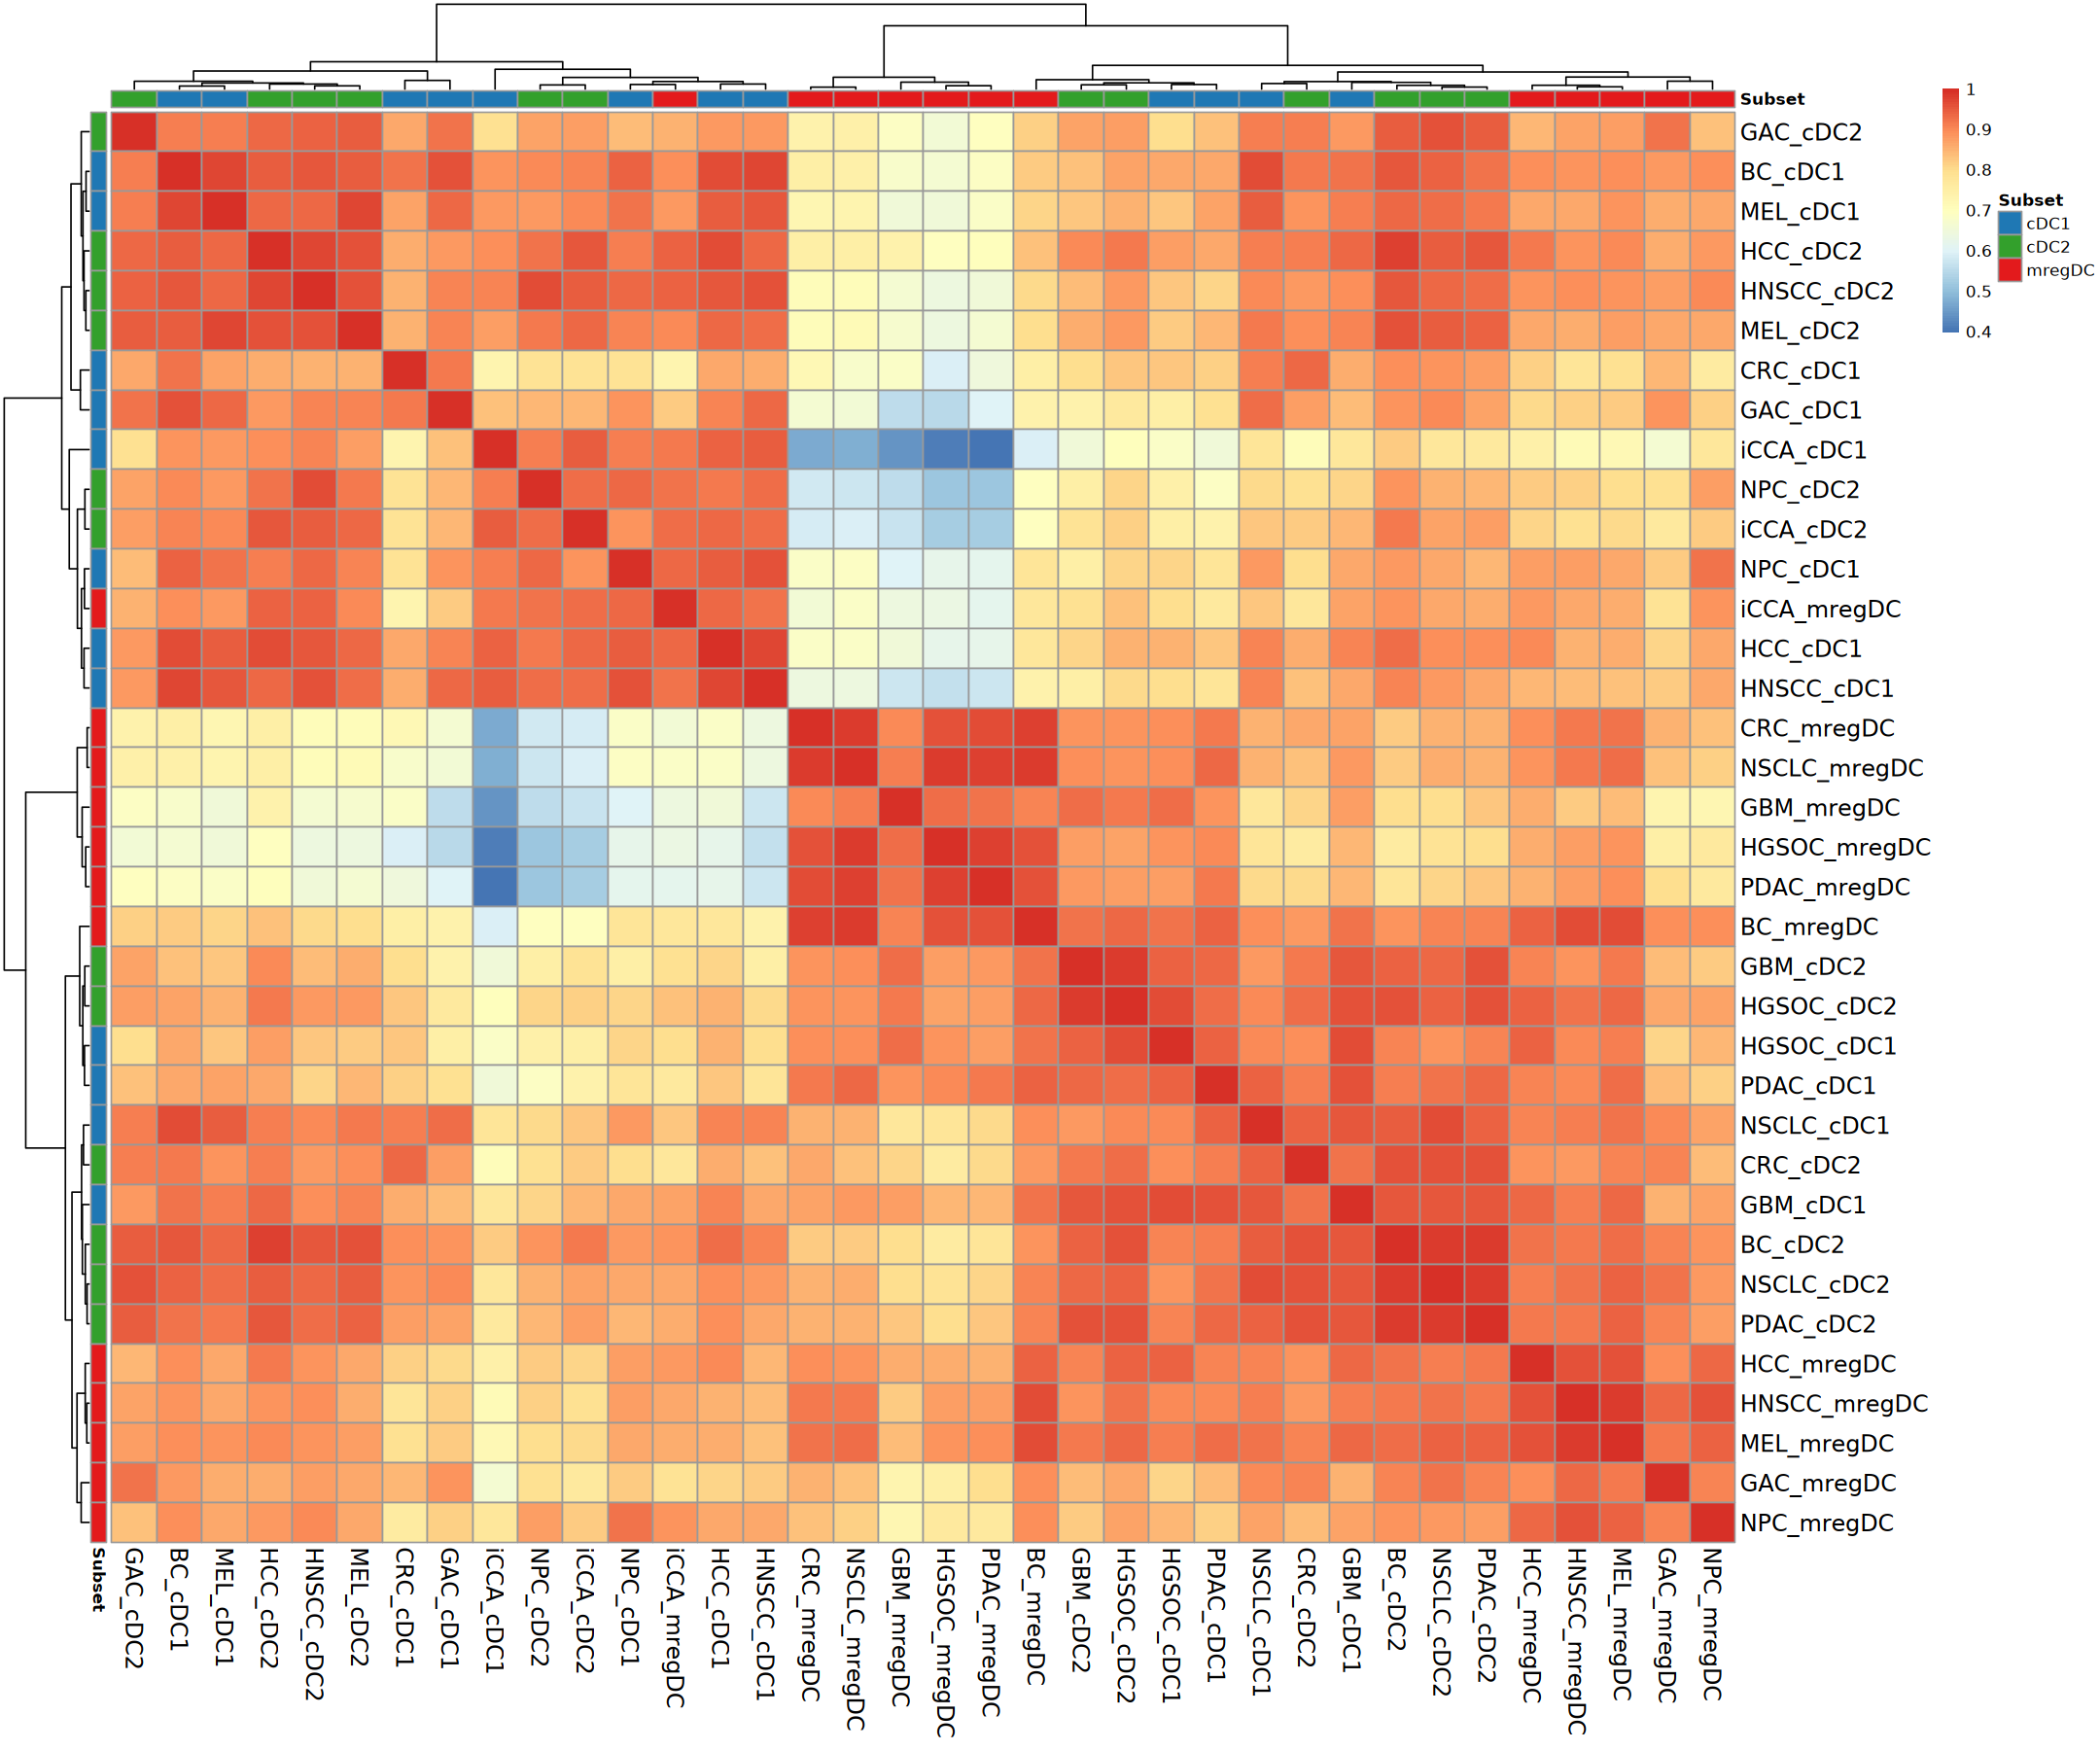

In [43]:
options(repr.plot.height=15, repr.plot.width=18)
pheatmap(cor_mat,
         clustering_distance_rows = "euclidean",
         clustering_distance_cols = "euclidean",
         clustering_method = "ward.D2",
         fontsize_row = 14,
         fontsize_col = 14,
         annotation_col = cor_info,
         annotation_row = cor_info,
         annotation_colors = cor_colors)